# Libraries

## READ ONLY THE FINAL IMG SELECTED

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
from tensorflow.keras.preprocessing import image
import dask.dataframe as dd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
filtered_data = pd.read_csv("../data/FILTERED_FINAL_IMBD_DATA.csv", sep=',', engine='python', header=0)

In [3]:
code_list_filtered_data = list(filtered_data['CODE'])

In [4]:
dir = '../data/img/'
dirImages = os.listdir(dir)

In [5]:
import pandas as pd

string = '.png'

filtered_ListImages = (pd.Series(code_list_filtered_data) + string).tolist()
len(filtered_ListImages)

113646

In [6]:
dirImages = set (dirImages)
filtered_ListImages = set(filtered_ListImages)
films_in_comon = dirImages.intersection(filtered_ListImages)

In [7]:
films_in_comon = list(films_in_comon)

In [8]:
len(films_in_comon)

107181

In [8]:
import numpy
import PIL

array_img = pd.DataFrame(columns = ['CODE','IMG_VALUES'])
for i,id_image in enumerate(tqdm(films_in_comon[:5000])):
        img = PIL.Image.open(dir + id_image)
        img_array = numpy.array(img)
        array_img.loc[i] = [id_image]+[img_array] 

In [9]:
array_img.head(5)

,CODE,IMG_VALUES
0,tt0033044.png,"[[[236, 235, 207], [244, 231, 199], [252, 226,..."
1,tt0054183.png,"[[[62, 52, 50], [50, 40, 38], [64, 54, 52], [4..."
2,tt0315521.png,"[[[75, 34, 42], [64, 29, 33], [71, 40, 38], [5..."
3,tt0162632.png,"[[[53, 73, 159], [52, 70, 154], [52, 67, 150],..."
4,tt0094806.png,"[[[215, 38, 32], [200, 23, 17], [202, 25, 19],..."


## CREATE ONE DF WITH ALL THE DATA JOIN

In [10]:
filtered_data = pd.read_csv('../data/FILTERED_FINAL_IMBD_DATA.csv',sep=',', engine='python', header= 0,index_col = 0)
string = '.png'
filtered_data['CODE'] = (pd.Series(filtered_data['CODE']) + string).tolist()

In [11]:
filtered_df_with_img = array_img.set_index('CODE').join(filtered_data.set_index('CODE'))
coumns_names = list(filtered_df_with_img)

In [12]:
filtered_df_with_img.head(1)

,IMG_VALUES,TITLE,DESCRIPTION,DURATION,COLOR,YEAR,DIRECTOR,BUDGET,CWG,RATING,VOTES,METASCORE RATING,GENRES,LANGUAGE,COUNTRY,CONTENT RATING,KEYWORDS,WRITERS,OPENING WEEKEND
CODE,,,,,,,,,,,,,,,,,,,
tt0033044.png,"[[[236, 235, 207], [244, 231, 199], [252, 226,...",Shooting High,A movie company making a film about a famous s...,1h 5min,Black and White,(1940),Alfred E. Green,unknown,unknown,"6,2",87,unknown,Action | Comedy | Music | Western,English,USA,See all certifications Ã‚Â»,actress shares first name with character | sin...,"Lou Breslow (original screenplay), Owen Franci...",unknown


In [13]:
filtered_df_with_img.reset_index()

KeyboardInterrupt: 

In [ ]:
filtered_list_with_img = filtered_df_with_img.values.tolist()
filtered_numpy_with_img = np.array(filtered_list_with_img)
filtered_numpy_with_img = np.insert(filtered_numpy_with_img, 0, coumns_names, axis=0)
plt.imshow(filtered_numpy_with_img[2][0]/255)
plt.show()
np.save('../data/FILTERED_data_and_img',filtered_numpy_with_img)

In [48]:
filtered_df_with_img.to_pickle("BORRAR.csv")
unpickled_df = pd.read_pickle("BORRAR.csv")

In [ ]:
filtered_df_with_img.to_json('BORRAR.json')
df = pd.read_json('BORRAR.json')

In [ ]:
filtered_numpy_with_img = np.array(unpickled_df)

In [ ]:
filtered_numpy_with_img.shape

In [ ]:
filtered_numpy_with_img = np.array(df)

In [53]:
import numpy
import PIL
import cv2
array_img = pd.DataFrame(columns = ['CODE','IMG_VALUES'])
for i,id_image in enumerate(tqdm(films_in_comon[:10000])):
        img = PIL.Image.open(dir + id_image)
        img_array = numpy.array(img)
        array_img.loc[i] = [id_image]+[img_array] 

KeyboardInterrupt: 

In [54]:
import cv2
def read_img(img_path):
    img = cv2.imread(img_path)   # reads an image in the BGR format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # BGR -> RGB
    return img

train_img = []


for i,id_image in enumerate(tqdm(films_in_comon[:107000])):
    train_img.append(read_img('../data/img/' + id_image))

In [55]:
len(train_img[1])

268

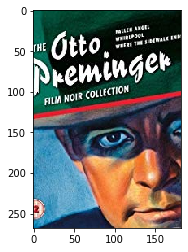

In [57]:
plt.imshow(train_img[106999])